Dataset Information:
Number of samples: 178
Number of features: 13
Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target classes: ['class_0' 'class_1' 'class_2']
Class distribution: [59 71 48]

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1      

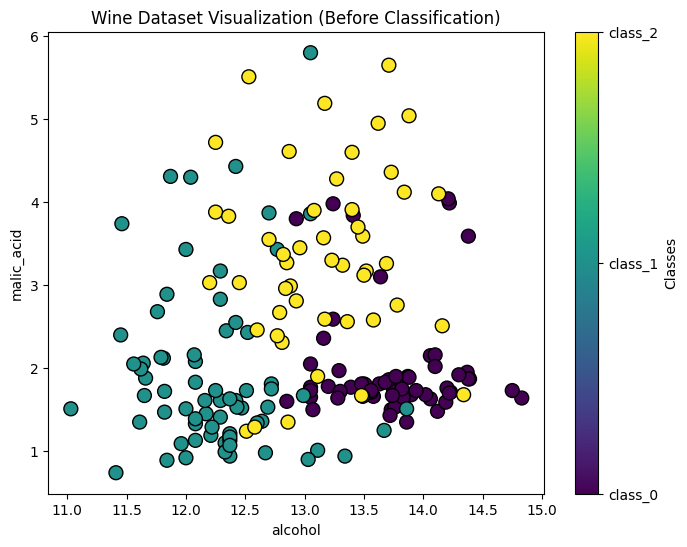

Accuracy of k-NN: 74.07%

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.75      0.71      0.73        21
           2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54



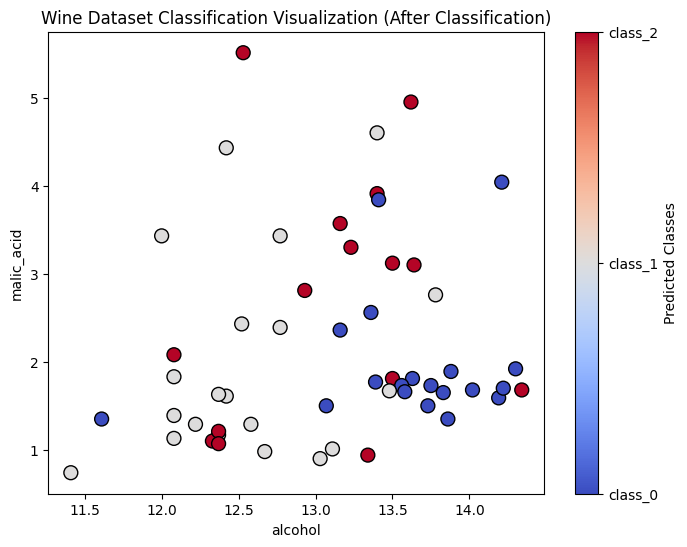

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load the Wine dataset
wine_data = load_wine()
X = wine_data.data  # Features
y = wine_data.target  # Targets

# Display dataset information
print("Dataset Information:")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Feature names: {wine_data.feature_names}")
print(f"Target classes: {wine_data.target_names}")
print(f"Class distribution: {np.bincount(y)}\n")  # Shows how many samples per class

# Converting the Wine dataset to a DataFrame for better visualization
wine_df = pd.DataFrame(data=np.c_[wine_data['data'], wine_data['target']],
                       columns=wine_data['feature_names'] + ['target'])

# Mapping target values to class names
wine_df['target'] = wine_df['target'].map({0: 'Class 0', 1: 'Class 1', 2: 'Class 2'})
# Display the first few rows of the dataset
print(wine_df.head())

# Visualizing the data before classification (using first two features for 2D plot)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.title('Wine Dataset Visualization (Before Classification)')
plt.xlabel(wine_data.feature_names[0])  # Feature 1
plt.ylabel(wine_data.feature_names[1])  # Feature 2
colorbar = plt.colorbar(label='Classes')
colorbar.set_ticks([0, 1, 2])
colorbar.set_ticklabels(wine_data.target_names)  # Adding class labels to colorbar
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Implementing k-Nearest Neighbors with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)  # Train the k-NN model on the training data

# Making predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print accuracy and classification report
print(f"Accuracy of k-NN: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_rep)

# Visualizing the data after classification (using first two features for 2D plot)
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', edgecolor='k', s=100)
plt.title('Wine Dataset Classification Visualization (After Classification)')
plt.xlabel(wine_data.feature_names[0])  # Feature 1
plt.ylabel(wine_data.feature_names[1])  # Feature 2
colorbar = plt.colorbar(label='Predicted Classes')
colorbar.set_ticks([0, 1, 2])
colorbar.set_ticklabels(wine_data.target_names)  # Adding class labels to colorbar
plt.show()
